In [ ]:
# 데이터
import pandas
import numpy

# 가시화
import matplotlib
import seaborn

import sklearn

In [ ]:
## 중복처리
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'first': ['a','a','a','b','b'],
    'second': [1 , 1, 1, 1, 2],
    'final': [1, 1, 2, 2, 2]
})

print(df.duplicated)

df2 = df.drop_duplicates()
# print(df2)

df3 = df.drop_duplicates(subset=['second','final'],keep='last')
# print(df3)

,first,second,final
0,a,1,1
1,a,1,1
2,a,1,2
3,b,1,2
4,b,2,2


In [ ]:
# isin()
mask = titanic.sibsp.isin([2,3,4])
titanic[mask].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.075,R,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.125,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.075,R,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.000,R,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.000,R,Third,woman,False,NaN,Southampton,no,False


In [ ]:
## Filtering Data
import seaborn as sns
titanic = sns.load_dataset('titanic')

mask1 = (titanic.age >= 10) & (titanic.age < 20)
mask2 = (titanic.pclass == 1) & (titanic.age < 20)

#1 - loc
df_teenage = titanic.loc[mask2,:]
print(len(df_teenage))

#2 - direct
df_teenage2 = titanic[(titanic.age >=10) & (titanic.age < 20)]
df_teenage2

165


In [ ]:
## Factorize
import seaborn as sns
titanic = sns.load_dataset('titanic')

# sex_encoded, sex_category = titanic['embarked'].factorize()
sex_encoded, sex_category = pd.factorize(titanic['embarked'])
print(sex_encoded)

In [ ]:
# Get dummies()
pd.get_dummies(titanic.embarked)

In [ ]:
## Label Encoding
# NaN값에 'S' 입력처리
titanic.loc[titanic['embarked'].isnull(), 'embarked'] = 'S'

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(titanic.embarked)
encoder.transform(titanic.embarked)

In [ ]:
## One-Hot Encoding
# NaN값에 'S' 입력처리
df.loc[titanic['embarked'].isnull(), 'embarked'] = 'S'

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
embarked_encoded, embarked_categories = titanic['embarked'].factorize()
embarked_hot = encoder.fit_transform(embarked_encoded.reshape(-1, 1))
print(embarked_hot.toarray())

In [ ]:
## Data Type
df = pd.read_csv('/content/stock-data.csv')
df['Average'] = (df['High'] + df['Low'])/2
df['Average'] = df['Average'] * 0.741931

In [ ]:
# Data Type - round
df['Average_round'] = df['Average'].round(3)
df.head()

In [ ]:
# Data Type - type
df['Average_round1'] = df['Average_round'].astype('str')
df['Average_round2'] = df['Average_round'].astype('int')
df['Average_round3'] = df['Average_round'].astype('float')
df['Average_round4'] = df['Average_round'].astype('category')
df

In [ ]:
# Data Type - unique
df['Date'].unique()

20

In [ ]:
# Replace
titanic['embarked'].replace('C','R',inplace=True)

titanic['embarked'].replace({'C':'P','S':'R'},inplace=True)
titanic.head(30)

In [ ]:
## Groupby - 그룹화
import seaborn as sns
titanic = sns.load_dataset('titanic')

# print(titanic[titanic.sex == 'male'].age.mean())
# print(titanic[titanic.sex == 'female'].age.mean())

titanic.groupby(['sex','class'])['survived'].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [ ]:
## Groupby - 그룹화
import seaborn as sns
titanic = sns.load_dataset('titanic')

# print(titanic[titanic.sex == 'male'].age.mean())
# print(titanic[titanic.sex == 'female'].age.mean())

titanic.groupby(['sex','class'])['survived'].agg(['mean','sum'])

mean  sum
sex    class                
female First   0.968085   91
       Second  0.921053   70
       Third   0.500000   72
male   First   0.368852   45
       Second  0.157407   17
       Third   0.135447   47

In [ ]:
## Pivot Table
titanic.pivot_table(index = 'sex',values='survived',aggfunc=['sum','mean'])

,sum,mean
,survived,survived
sex,,
female,233,0.742038
male,109,0.188908


In [ ]:
## Apply - 함수를 적용
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10
df.head()

In [ ]:
def twice(n):
    return 2*n

def multiple(n,k):
    return n*k

# 기본 사용법
df['twice_age'] = df['age'].apply(twice)

# 인자가 여러개인 함수
df['multiple_age'] = df['age'].apply(multiple,k=10)

# 함수정의 없이 사용하는 방법 : lambda
df['add_ten_age'] = df['age'].apply(lambda x: x+10)

# df 전체에 대해서
df.applymap(twice)

# 여러 컬럼들을 하나의 함수에 넣을 경우
def add_columns(a,b):
    return (a+b)*2

df['added_fare'] = df.apply(lambda x: add_columns(x['fare'],x['ten']),axis=1)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

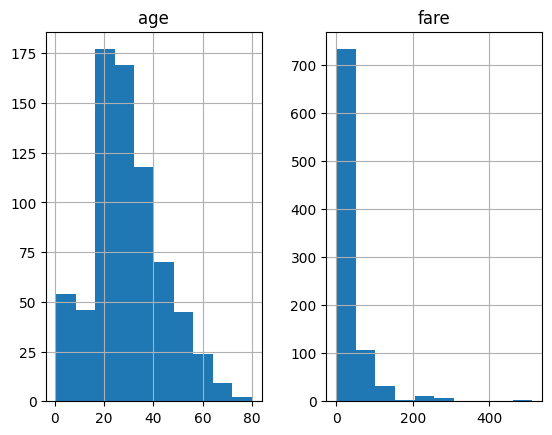

In [ ]:
df[['age','fare']].hist()

In [ ]:
## Scaling - SKLEARN : Minmax : 정규화 : 0~1 범위로 데이터 분포를 맞춰준다.
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df)
print(fitted.data_max_)

output = min_max_scaler.transform(df)
output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
output.fare.hist()
# print(output.head())

In [ ]:
## Scaling - SKLEARN : Standard : 표준화 정규 분포로 변환해주는 과정 : 정규분포 형태로 나타낸다.
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
fitted = std_scaler.fit(output)
print(fitted.mean_)
## 출력 결과
## array([4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.93615825e+01,
##        5.23007856e-01, 3.81593715e-01, 3.22042080e+01])
output = std_scaler.transform(output)
output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
output.fare.hist()
# print(output.head())

In [ ]:
## 시계열 데이터
import pandas as pd
df = pd.read_csv("경로 입력")
df.head()

In [ ]:
## Join & Concat
import pandas as pd

df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])

print(df1, '\n')
print(df2)

In [ ]:
## Merge
import pandas as pd

df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])

print(df1, '\n')
print(df2)